## Media Campaign Cost Prediction

### Define the Problem

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
Food Mart was the nation's third-largest chain of convenience stores as of 1988.
The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

Devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.

[<img src="https://d1csarkz8obe9u.cloudfront.net/posterpreviews/grocery-store-logo-design-template-26efc5e6e40131b8138308aed1bb075b_screen.jpg?ts=1599902810">]()


### Gather the Data

The dataset is given to us via Kaggle
https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction

### Import Libraries

In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))


import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}".format(matplotlib.__version__))


#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.5.3
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 8.11.0
scikit-learn version: 1.2.2
matplotlib version: 3.7.1
-------------------------


### Load Data Modelling Libraries

In [137]:
#Common Model Algorithms
from sklearn import linear_model
import xgboost as xgb

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns
print("seaborn: {}". format(sns.__version__))

from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8

print("Imported")

seaborn: 0.12.2
Imported


### Meet and Greet Data

Get to know your data, 
- What does it look like (datatype and values), 
- What makes it tick (independent/feature variables(s)), 
- What's its goals in life (dependent/target variable(s)).


### Dataset Description I

- store_sales(in millions) - store_sales(in million dollars)
- unit_sales(in millions) - unit_sales(in millions) in stores Quantity
- Total_children - TOTAL CHILDREN IN HOME
- avg_cars_at home(approx) - avg_cars_at home(approx) 
- Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
- Gross_weight - gross_weight OF ITEM
- Recyclable_package - FOOD ITEM IS recyclable_package
- Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
- Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
- Store_sqft - STORE AREA AVAILABLE IN SQFT
- Coffee_bar - COFFEE BAR available in store
- Video_store - VIDEO STORE/gaming store available
- Salad_bar - SALAD BAR available in store
- Prepared_food - food prepared available in store
- Florist - flower shelves available in store
- Cost - COST ON ACQUIRING A CUSTOMERS in dollars

### Dataset Description II

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick overview of variable datatypes (i.e. qualitative vs quantitative)

- The `Cost` variable is our outcome or `Dependent Variable`. The variable "cost" is always rounded to 2 decimal places, and that's why it cannot take all possible values in an interval, so this technically should be discrete. But if you measure it accurately it should be treated as continuous. A continuous random variable can take all values in an interval, while discrete variable can only take countable values.

### Observing the shape(rows, columns) of our datasets

In [138]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_train = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/train_dataset.csv')
print("Shape of raw train data:")
print(data_train.shape)
print('-'*50)
#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_test  = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/test_dataset.csv')
print("Shape of test data:")
print(data_test.shape)
print('-'*50)



Shape of raw train data:
(360336, 17)
--------------------------------------------------
Shape of test data:
(240224, 16)
--------------------------------------------------


### Observing Our columns and Unique values in the dataset

In [139]:
cols = data_train.columns.to_list()
print(cols)
data_train[cols].nunique()

['id', 'store_sales(in millions)', 'unit_sales(in millions)', 'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']


id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64

#### Observations:

Here we see we have total of `16 Columns` 

We have `15 Independent Features` and `1 Dependent Feature` which is the `Cost` feature

There are 11 `Categorical Features`:

If we look a step further we can divide these 11 Categorical Features even further, by differentiating between Binary(1s & 0s) and Ordinal Features()


`Binary Features`:

- recyclable_package
- low_fat
- coffee_bar
- video_store
- salad_bar
- prepared_food
- florist 

`Ordinal data` has a natural ordering where a number is present in some kind of order by their position on the scale. Ordinal data is `qualitative` data for which their values have some kind of relative position. These kinds of data can be considered “in-between” qualitative and quantitative data.

- unit_sales(in millions)
- total_children
- num_children_at_home
- avg_cars_at home(approx).1


There are 5 `Numerical Features`:

Continuous data is in the form of fractional numbers. Continuous data represents information that can be divided into smaller levels. The continuous variable can take any value within a range. 

These five Features are Continuous:

- store_sales(in millions)
- units_per_case
- gross_weight
- store_sqft
- Cost 


In [140]:

#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data_train_copy = data_train.copy(deep = True)


#preview data
print(data_train_copy.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_train.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_train.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
print('-'*50)

data_train_copy.sample(15) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
45349,45349,7.24,4.0,4.0,1.0,1.0,7.64,0.0,1.0,23.0,30268.0,0.0,0.0,0.0,0.0,0.0,89.37
48106,48106,1.71,3.0,4.0,4.0,2.0,21.70,1.0,0.0,22.0,23593.0,0.0,0.0,0.0,0.0,0.0,112.19
94088,94088,4.59,3.0,1.0,0.0,3.0,18.20,0.0,1.0,9.0,23112.0,1.0,1.0,1.0,1.0,1.0,144.54
67169,67169,11.79,3.0,5.0,0.0,3.0,21.90,1.0,0.0,27.0,36509.0,0.0,0.0,0.0,0.0,0.0,104.41
253519,253519,5.96,4.0,1.0,1.0,4.0,13.00,0.0,1.0,32.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
343805,343805,15.56,4.0,1.0,0.0,3.0,7.74,0.0,0.0,6.0,33858.0,1.0,0.0,1.0,1.0,1.0,149.08
245412,245412,8.88,3.0,3.0,2.0,2.0,21.40,1.0,0.0,23.0,23759.0,1.0,0.0,1.0,1.0,1.0,75.76
202254,202254,11.85,3.0,2.0,0.0,3.0,18.30,0.0,0.0,35.0,30797.0,1.0,0.0,1.0,1.0,1.0,98.81
308826,308826,5.46,3.0,4.0,3.0,3.0,6.03,0.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0,57.52
316405,316405,3.75,3.0,1.0,0.0,2.0,6.98,1.0,0.0,35.0,39696.0,0.0,0.0,1.0,1.0,0.0,106.10


In [141]:
print(data_train_copy.head(3))

   id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   2.0                         2.0         10.30   
1                   0.0                         3.0          6.66   
2                   0.0                         3.0         21.30   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            32.0     36509.0         0.0   
1                 1.0      0.0             1.0     28206.0         1.0   
2                 1.0      0.0            26.0     21215.0         1.0   

   video_store  salad_bar  prepared_food  florist    cost  
0          0.0        0.0            0.0      0.0   62.09  
1

In [142]:
print(data_test.head(3))

       id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0  360336                      7.24                      4.0             1.0   
1  360337                      6.90                      2.0             2.0   
2  360338                      8.34                      3.0             0.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   0.0                         2.0         10.80   
1                   2.0                         3.0          8.51   
2                   0.0                         3.0          8.77   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 0.0      1.0             7.0     20319.0         0.0   
1                 1.0      0.0             4.0     33858.0         1.0   
2                 0.0      1.0            14.0     39696.0         0.0   

   video_store  salad_bar  prepared_food  florist  
0          0.0        0.0            0.0      0.0  
1

### Checking for Null values

In [143]:
print('Train columns with null values:\n', data_train_copy.isnull().sum())
print("-"*50)


Train columns with null values:
 id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64
--------------------------------------------------


In [144]:
print('Test/Validation columns with null values:\n', data_test.isnull().sum())
print("-"*50)

Test/Validation columns with null values:
 id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64
--------------------------------------------------


In [145]:
data_train_copy.describe(include = 'all').T


,count,mean,std,min,25%,50%,75%,max
id,360336.0,180167.500000,104020.187637,0.00,90083.75,180167.50,270251.25,360335.00
store_sales(in millions),360336.0,6.337376,3.307980,0.51,3.72,5.78,8.40,22.92
unit_sales(in millions),360336.0,3.043881,0.784676,1.00,3.00,3.00,4.00,6.00
total_children,360336.0,2.456482,1.488992,0.00,1.00,2.00,4.00,5.00
num_children_at_home,360336.0,0.689390,1.214732,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,360336.0,2.203813,1.084293,0.00,1.00,2.00,3.00,4.00
gross_weight,360336.0,13.822071,4.614792,6.00,9.71,13.60,17.70,21.90
recyclable_package,360336.0,0.568086,0.495343,0.00,0.00,1.00,1.00,1.00
low_fat,360336.0,0.327797,0.469411,0.00,0.00,0.00,1.00,1.00
units_per_case,360336.0,18.972706,10.212912,1.00,10.00,20.00,28.00,36.00


In [146]:
data_test.describe(include = 'all').T


,count,mean,std,min,25%,50%,75%,max
id,240224.0,480447.500000,69346.839870,360336.00,420391.75,480447.5,540503.25,600559.00
store_sales(in millions),240224.0,6.353813,3.307402,0.51,3.75,5.8,8.40,22.92
unit_sales(in millions),240224.0,3.043930,0.782982,1.00,3.00,3.0,4.00,6.00
total_children,240224.0,2.454039,1.487416,0.00,1.00,2.0,4.00,5.00
num_children_at_home,240224.0,0.685381,1.211368,0.00,0.00,0.0,1.00,5.00
avg_cars_at home(approx).1,240224.0,2.198173,1.085129,0.00,1.00,2.0,3.00,4.00
gross_weight,240224.0,13.828380,4.623458,6.00,9.71,13.6,17.80,21.90
recyclable_package,240224.0,0.565747,0.495660,0.00,0.00,1.0,1.00,1.00
low_fat,240224.0,0.326928,0.469092,0.00,0.00,0.0,1.00,1.00
units_per_case,240224.0,18.959933,10.216219,1.00,10.00,20.0,28.00,36.00


#### Null Values

As we can see the dataset contains no null values.


#### Dataset Feature Distributions

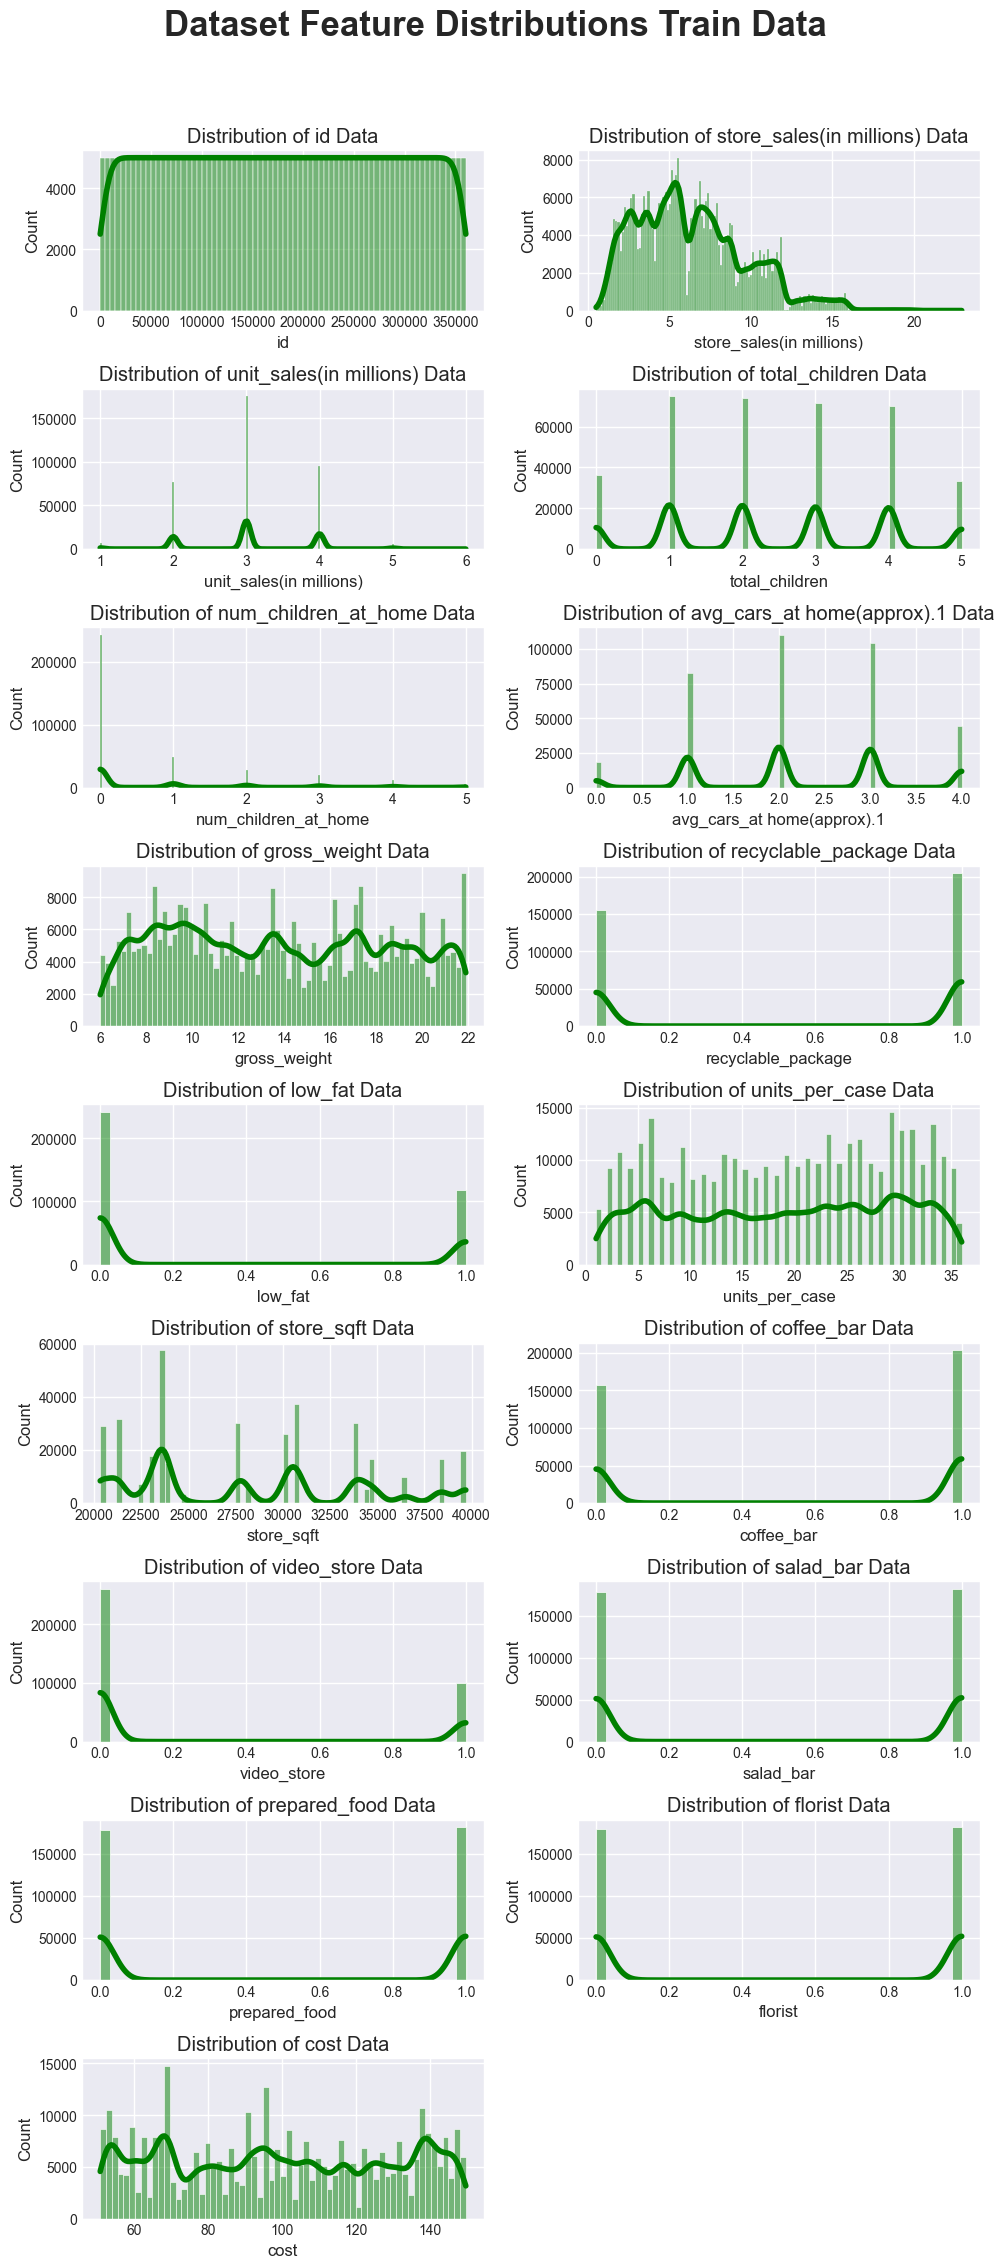

In [147]:
plt.figure(figsize=(10,30))
sns.set_style('darkgrid')
plt.suptitle(f'Dataset Feature Distributions Train Data\n\n\n', ha='center',  fontweight='bold', fontsize=25)
for i,col in enumerate(data_train_copy.columns,1):
    plt.subplot(12,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data_train_copy[col],kde=True, color="green")
    plt.tight_layout()
    plt.plot()
plt.show()


### Observations:

We can see that the distribution of our Cost feature (our target value) is not normally distributed but is not skewed either.

Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.


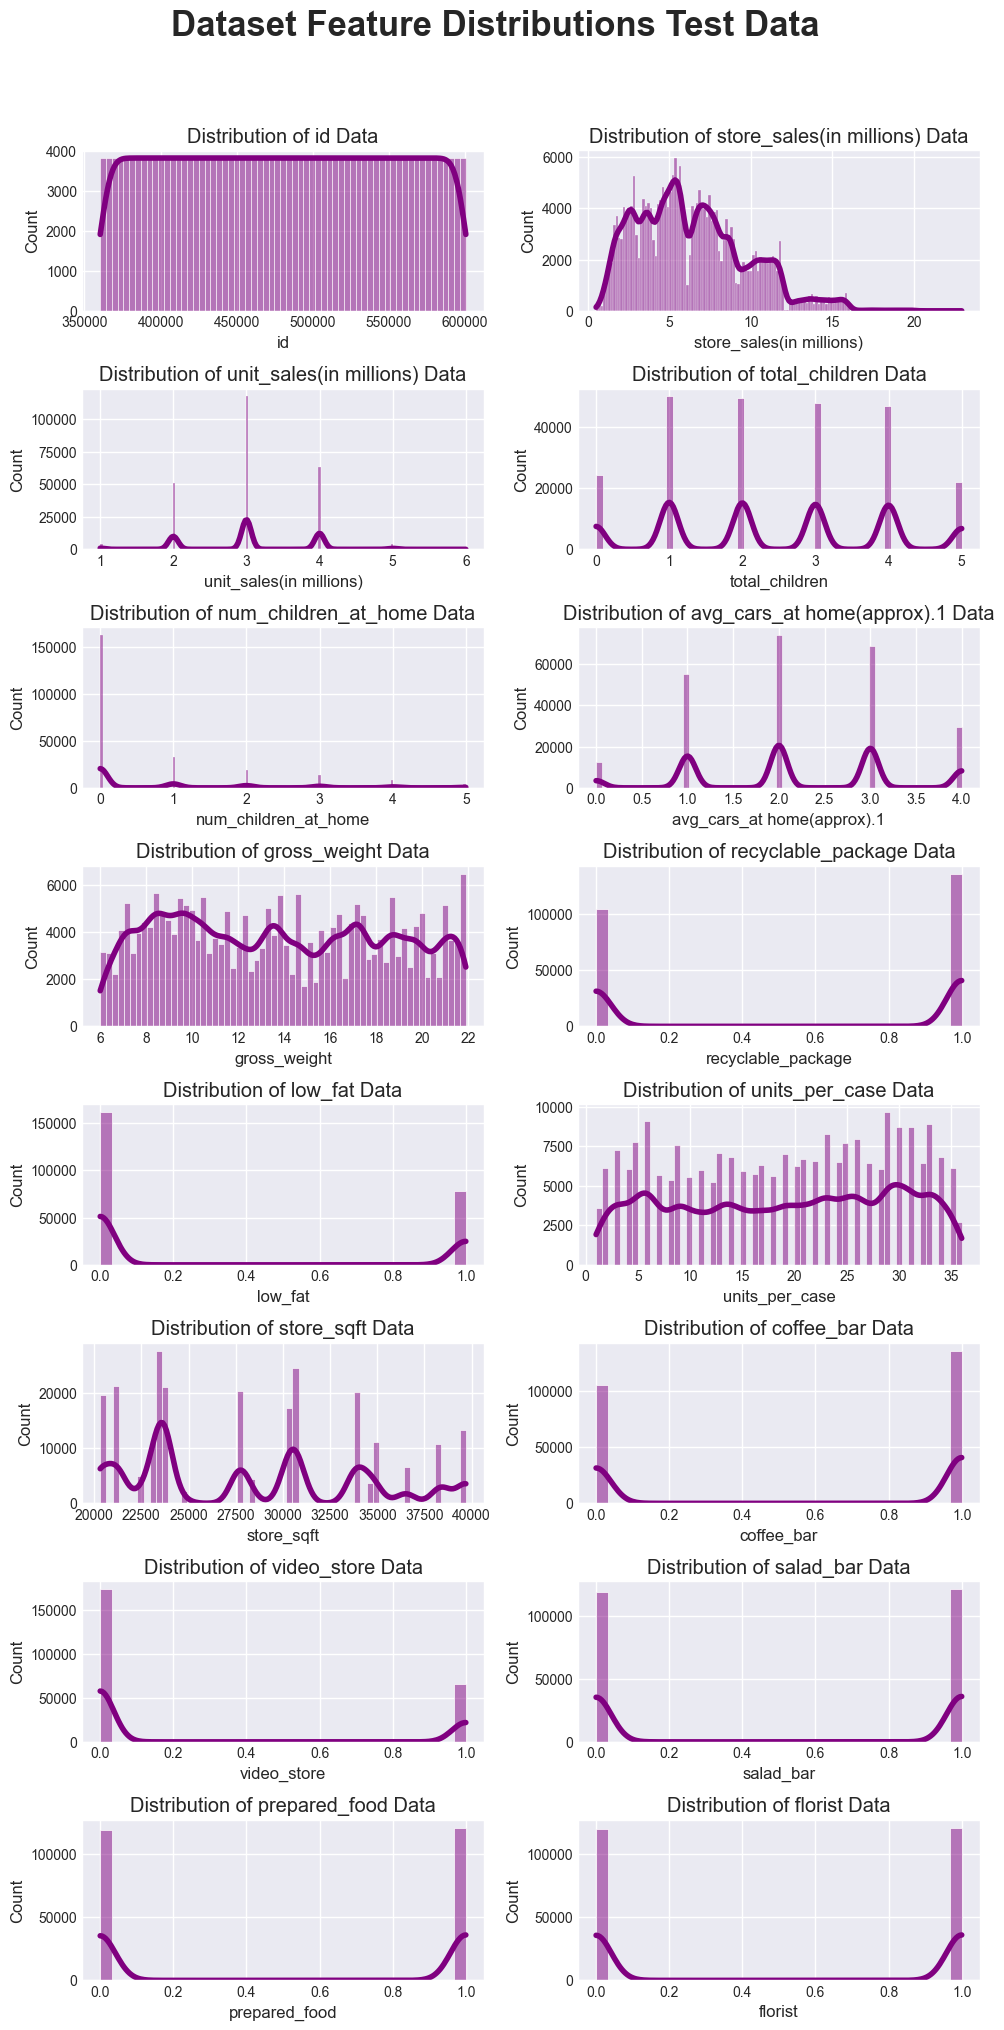

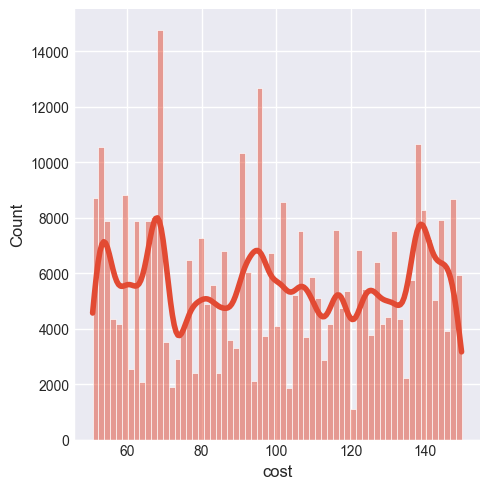

In [148]:
plt.figure(figsize=(10,30))
sns.set_style('darkgrid')
plt.suptitle(f'Dataset Feature Distributions Test Data\n\n\n', ha='center',  fontweight='bold', fontsize=25)
for i,col in enumerate(data_test.columns,1):
    plt.subplot(12,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data_test[col],kde=True, color='purple')
    plt.tight_layout()
    plt.plot()
plt.show()

sns.displot(data_train_copy, x="cost", kde=True)

### Observations:

If we observe both distributions from the train an test datasets we see minimal difference in distribution.

#### Graph distribution of quantitative data or numerical variables (BoxPlots)

As we can see from the various box plots there are virtually no outliers in our numerical variables except in our Store Sales feature.


Text(0, 0.5, 'count')

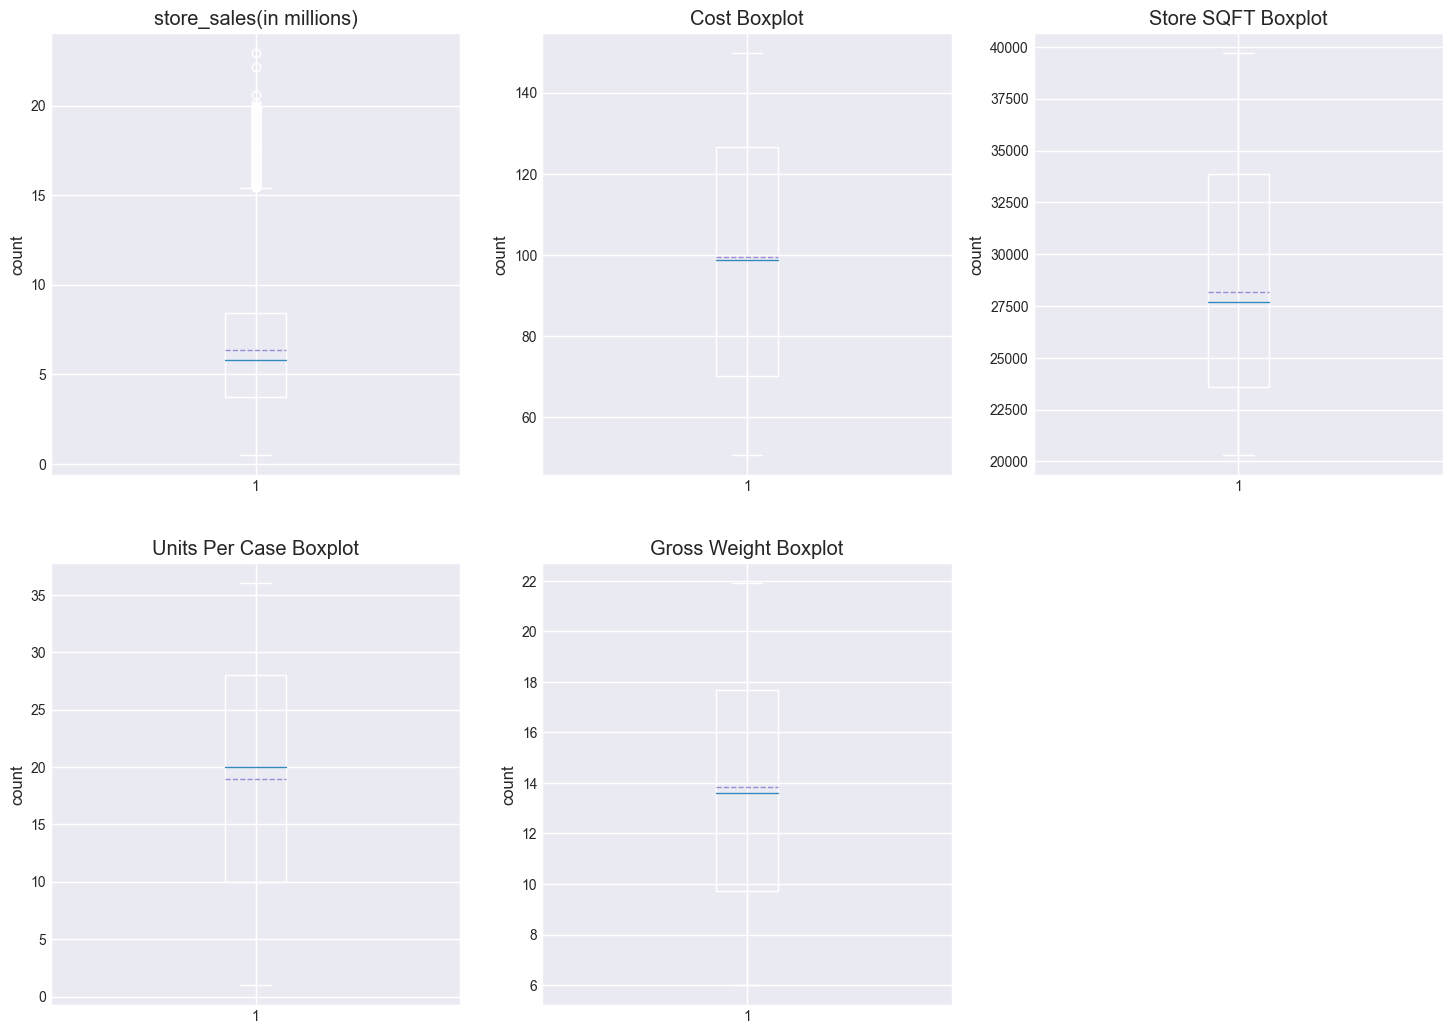

In [149]:
#graph distribution of quantitative data or numerical variables
plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(x=data_train_copy['store_sales(in millions)'], showmeans = True, meanline = True)
plt.title('store_sales(in millions)')
plt.ylabel('count')

plt.subplot(232)
plt.boxplot(data_train_copy['cost'], showmeans = True, meanline = True)
plt.title('Cost Boxplot')
plt.ylabel('count')

plt.subplot(233)
plt.boxplot(data_train_copy['store_sqft'], showmeans = True, meanline = True)
plt.title('Store SQFT Boxplot')
plt.ylabel('count')

plt.subplot(234)
plt.boxplot(data_train_copy['units_per_case'], showmeans = True, meanline = True)
plt.title('Units Per Case Boxplot')
plt.ylabel('count')


plt.subplot(235)
plt.boxplot(data_train_copy['gross_weight'], showmeans = True, meanline = True)
plt.title('Gross Weight Boxplot')
plt.ylabel('count')


### Finding Correlations in our data and the Cost Feature

In [150]:
correlation_matrix = data_train_copy.corr()
correlation_matrix['cost'].sort_values(ascending=False)


cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64

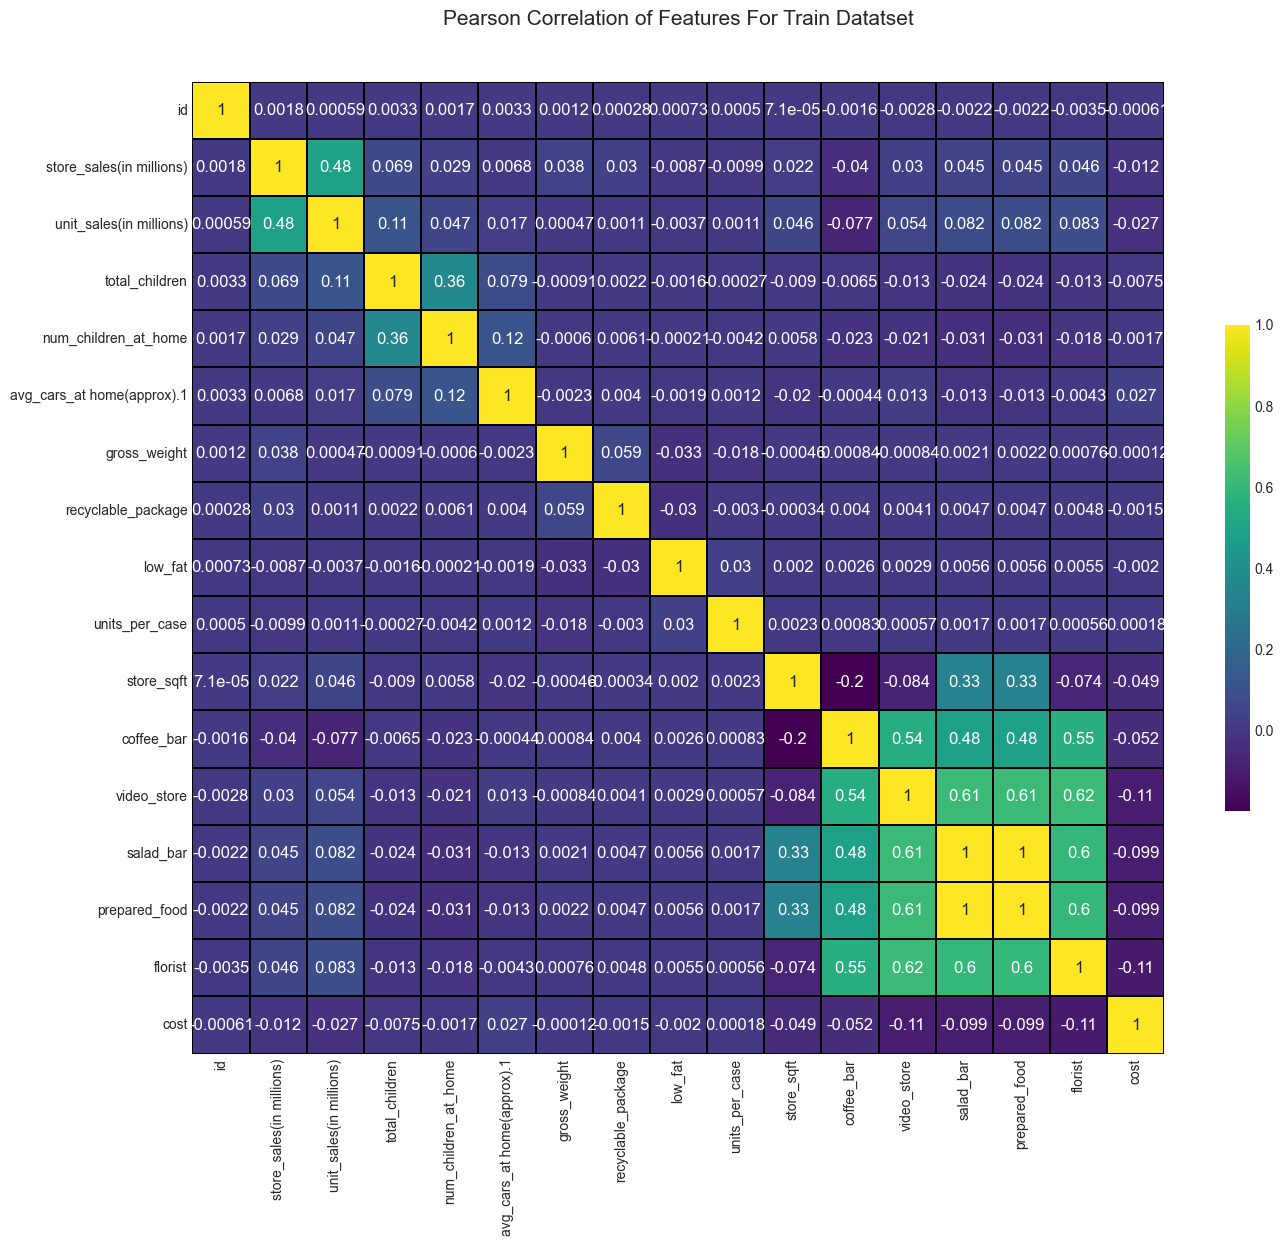

In [151]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data_train_copy.corr(), 
        cmap = "viridis",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features For Train Datatset', y=1.05, size=15)

correlation_heatmap(data_train_copy)

### Observations:

Firstly we can see that in both datasets our Dependent Variable `Cost` is not correlated to any other feature.

There is however a perfect correlation of (1) between `prepared_food` and `salad_bar`, we might want to drop one of these features in the feature engineering phase.



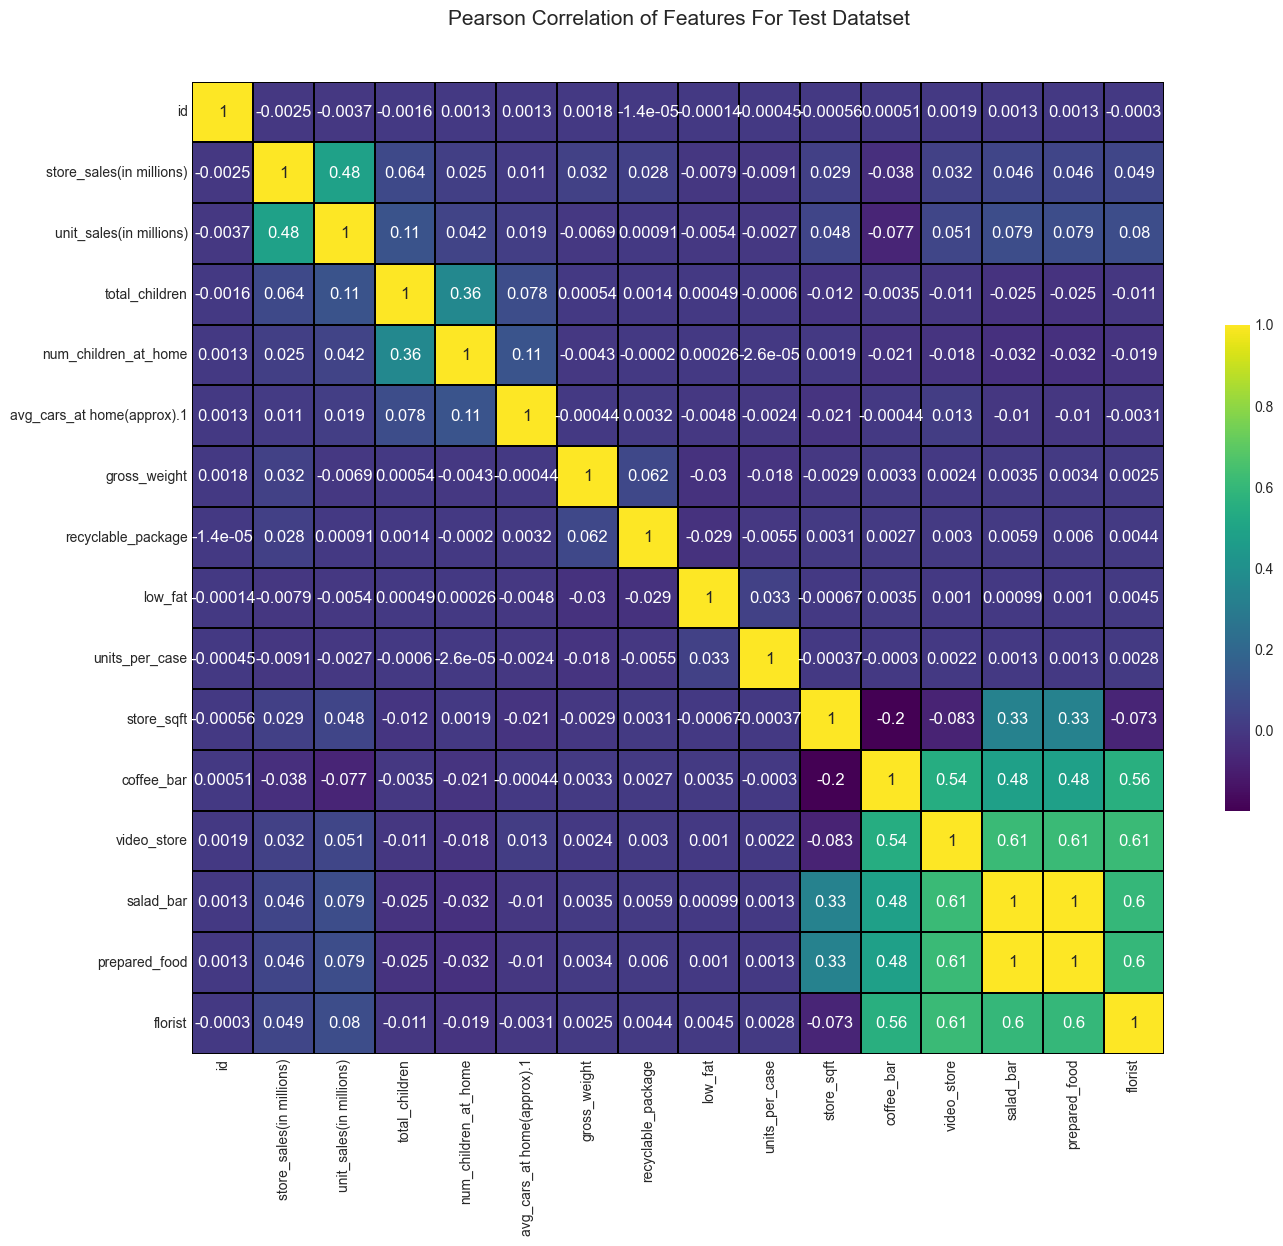

In [152]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data_test.corr(), 
        cmap = "viridis",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features For Test Datatset', y=1.05, size=15)

correlation_heatmap(data_test)

### Treating categorical data before feeding to model

If the feature is categorical, it means that each value has a separate meaning, so normalizing will turn this features into something different.

There are several ways to deal with categorical data:

- `One-hot encoding`: for each category you create a separate column with binary values;
- Leave it as it is for `tree-based models`;
- `Encode` it with means of target values;

If you are using XGBoost with decision trees as your base model, you don't need to worry about scaling or normalizing your features. Decision trees are not sensitive to the scale of the features.


### Feature Engineering / Pre-Processing

We will drop prepared_food since it is heavily correlated to salad_bar

In [153]:
# Original Dataset
data_train_copy


,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


### Choosing Model and fitting our data

In [154]:
#Our Independent Features
X_train = data_train_copy.drop(['prepared_food', 'cost'], axis=1)
X_train

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0
360332,360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0
360333,360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0
360334,360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0


In [155]:
# Our Dependent Feature / Target
y_train = data_train_copy['cost'] 
y_train

0          62.09
1         121.80
2          83.51
3          66.78
4         111.51
           ...  
360331    133.42
360332     81.85
360333     87.07
360334    146.72
360335    122.47
Name: cost, Length: 360336, dtype: float64

### In order to evaluate the performance of our model, we split the data into training and test sets.

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

seed = 7
test_size = 0.24
X = data_train_copy.drop(['prepared_food', 'cost'], axis=1)
y = data_train_copy['cost'] 

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
  X, 
  y, 
  test_size=test_size,
  random_state=seed,
  shuffle=True)
 
# printing out train and test sets
print("-"*50)
print('X_train : ')
#print(X_train.columns)
print(X_train.shape)
 
print("-"*50)
print('X_test : ')
#print(X_test.columns)
print(X_test.shape)
 
print("-"*50)
print('y_train : ')
print(y_train.head(2))
print(y_train.shape)
 
print("-"*50)
print('y_test : ')
print(y_test.head(2))
print(y_test.shape)

--------------------------------------------------
X_train : 
(273855, 15)
--------------------------------------------------
X_test : 
(86481, 15)
--------------------------------------------------
y_train : 
85156     67.20
328095    59.19
Name: cost, dtype: float64
(273855,)
--------------------------------------------------
y_test : 
37851     53.82
348767    82.61
Name: cost, dtype: float64
(86481,)


### Next, we initialize an instance of the XGBRegressor class. We can select the value of Lambda and Gamma, as well as the number of estimators and maximum tree depth.

You can specify hyperparameter values to the class constructor to configure the model.

Perhaps the most commonly configured hyperparameters are the following:

- n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
- max_depth: The maximum depth of each tree, often values are between 1 and 10.
eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
- subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
- colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all feature

In [157]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================




from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

# create an xgboost regression model
model = xgb.XGBRegressor(eval_metric='rmsle')




### GridSearchCV

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. 

Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

In [158]:
#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(
    model, 
    param_grid, 
    cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 6, 'n_estimators': 700}


### These values will be used for our hyperparameters in our final calculation

In [159]:
model = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

model.fit(X_train, y_train)
y_predict = model.predict(X_test)


In [160]:
print("R Square: %.3f" % r2_score(y_test, y_predict))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_predict))
print("RMSE: %.3f" % mean_squared_error(y_test, y_predict, squared=False))
print("RMSEL: %.3f" % mean_squared_log_error(y_test, y_predict, squared=False))

R Square: 0.096
Mean squared error: 809.468
RMSE: 28.451
RMSEL: 0.304


### Feature Importance

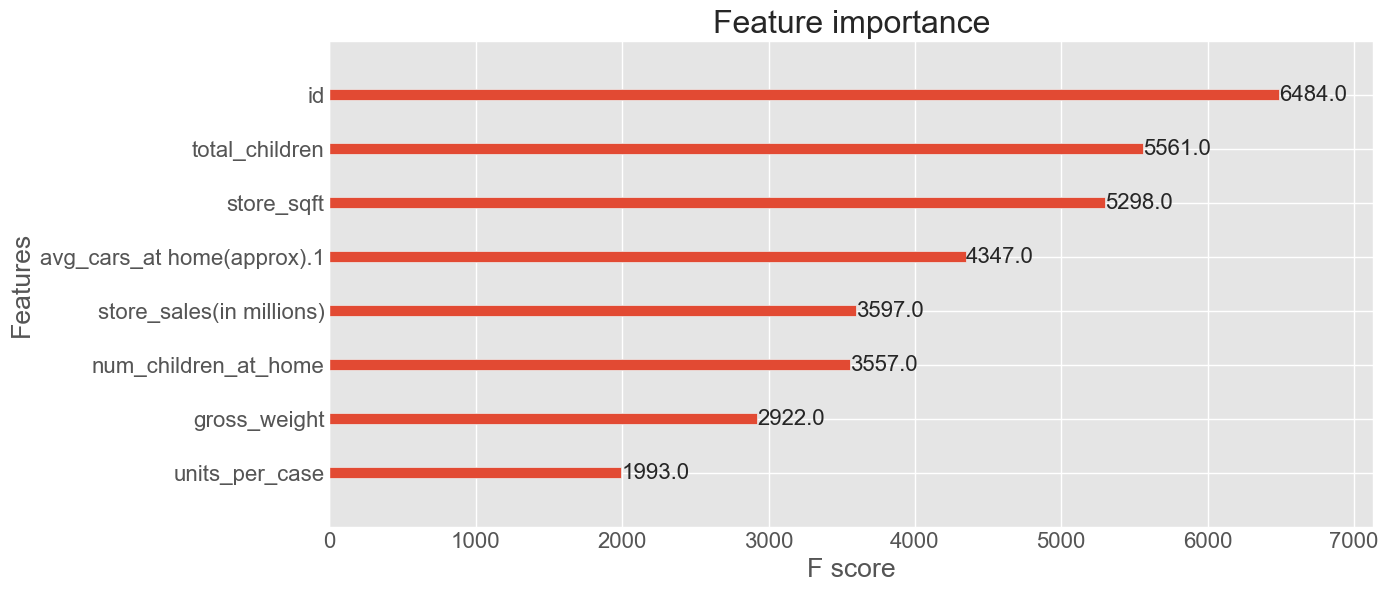

In [161]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=8, ax=ax)
plt.show();

### Submission.csv

In [184]:
print(data_train_copy.columns)
print(data_test.columns)

Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')
Index(['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist'],
      dtype='object')


In [186]:
selected_feat = ['id', 'store_sales(in millions)', 'unit_sales(in millions)',
       'total_children', 'num_children_at_home', 'avg_cars_at home(approx).1',
       'gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'florist']

X_test = data_test[selected_feat]
final_model = model
final_model.fit(X[selected_feat], y)
final_preds = final_model.predict(X_test)



In [192]:
final_preds
output = pd.DataFrame({'id': data_test['id'], 'cost':final_preds})
output.to_csv('submission.csv', index=False)

In [197]:
print(output.shape)
output.head()

(240224, 2)


,id,cost
0,360336,115.600670
1,360337,110.902702
2,360338,108.494316
3,360339,114.488464
4,360340,90.391678


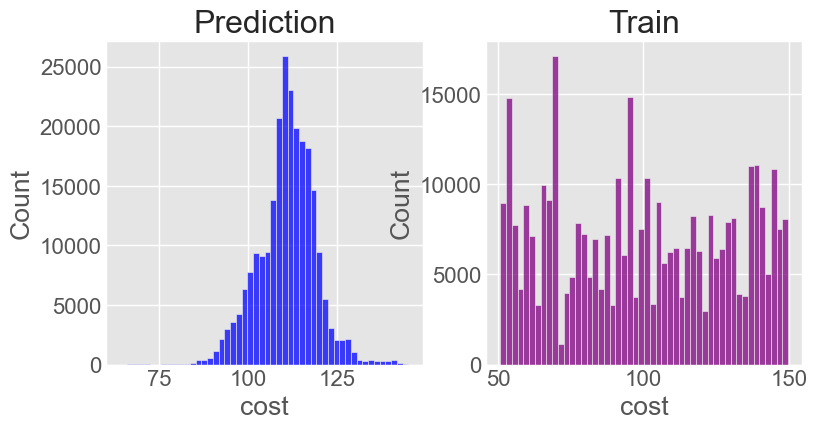

In [194]:
## Comparison between predicted and train distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.histplot(data=output, x="cost", label='Prediction', color='blue', bins=50, ax=axes[0])
sns.histplot(data=data_train_copy, x="cost", label='Train', color='purple', bins=50, ax=axes[1])

axes[0].set_title('Prediction')
axes[1].set_title('Train')

plt.show()

sample_submission.csv